In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [38]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


# Split features and target

In [4]:
X = df.iloc[:,0:9].values
y = df["Type"]

# Standarization

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)

# x

# Train test split

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=14)

# Model creation and validation

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[19,  6,  1,  0,  0,  0],
       [ 5, 13,  0,  2,  0,  0],
       [ 1,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  1],
       [ 1,  0,  0,  0,  0,  0],
       [ 2,  2,  0,  0,  0,  7]], dtype=int64)

In [12]:
accuracy_score(y_test,y_pred)

0.6307692307692307

In [13]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

0.7181208053691275

# K Fold testing

In [18]:
from sklearn.model_selection import KFold,cross_val_score

fold = KFold(n_splits=10)

model1 = KNeighborsClassifier()
results=cross_val_score(model1,x,y,cv=fold)

In [19]:
results.min(),results.max()

(0.0, 0.9523809523809523)

In [20]:
results.mean()

0.5523809523809524

# choose the number of k

In [24]:
est = []

for i in range(1,18):
    model = KNeighborsClassifier(n_neighbors=i)
    est.append(model)

In [25]:
score = []

for i in range(len(est)):
    est[i].fit(X_train,y_train)
    sc = est[i].score(X_test,y_test)
    score.append(sc)

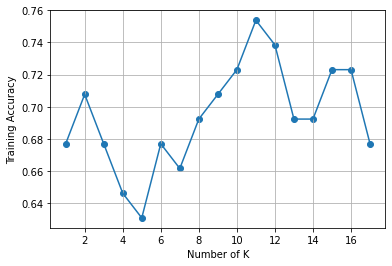

In [26]:
import matplotlib.pyplot as plt
plt.scatter(range(1,18),score)
plt.plot(range(1,18),score)
plt.xlabel("Number of K")
plt.ylabel("Training Accuracy")
plt.grid()

In [27]:
# so best possible values of k =13,14,16

# Final model

In [41]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16,metric='manhattan',p=2) # two possible metric='minkowski' is default other
# possible value is metric='manhattan' , check both for better accuraccy
model.fit(X_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=16)

In [42]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7230769230769231